In [1]:
from sklearn.datasets import make_classification
import numpy as np

In [2]:
X,y = make_classification(n_samples=100, n_features=2, n_informative=1,n_redundant=0,
                         n_classes=2,n_clusters_per_class=1,random_state=41,
                          hypercube=False,
                          class_sep=15)

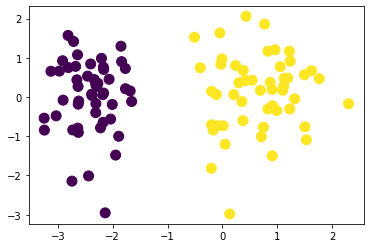

In [3]:
import matplotlib.pyplot as plt
plt.scatter(X[:,0],X[:,1],c=y,s=100)

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
def step(z):
        return 1 if z>0 else 0

In [6]:
class Perceptron:
    
    def __init__(self,learning_rate=0.1,epochs=1000):
        self.coef_ = None
        self.intercept_ = None
        self.lr = learning_rate
        self.epochs = epochs
        
    def fit(self,X_train,y_test):
        X = np.insert(X_train,0,1,axis=1)
        weights = np.ones(X.shape[1])
        
        for i in range(self.epochs):
            idx = np.random.randint(0,X.shape[0])
            y_hat = step(np.dot(X[idx],weights))
            weights = weights + self.lr *(y_train[idx]-y_hat)*X[idx]
            
        self.intercept_ = weights[0]
        self.coef_ = weights[1:]    

        #return self.intercept_,self.coef_
        
    def predict(self,X_test):
        pred =  np.dot(X_test,self.coef_) + self.intercept_
        pred = np.where(pred > 0, 1, 0)
        return pred
                

In [7]:
percp = Perceptron(epochs=100,learning_rate =0.1)
percp.fit(X_train,y_train)

In [8]:
percp.predict(X_test)

array([1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1])

In [9]:
coef = percp.coef_

In [10]:
coef

array([1.16356431, 0.72800865])

In [11]:
intercept = percp.intercept_

In [12]:
m = -(coef[0]/coef[1])
b = -(intercept/coef[1])

In [13]:
print(m,b)

-1.5982836398463074 -1.3736100553254382


In [14]:
x_input = np.linspace(-3,3,80)
y_input = m*x_input + b

(-4.0, 3.0)

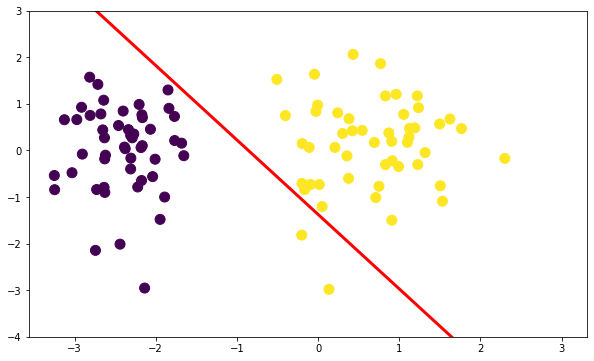

In [15]:
plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,c='r',linewidth=3)
plt.scatter(X[:,0],X[:,1],c=y,s=100)
plt.ylim(-4,3)

# ANIMATION

In [16]:
def perceptron(X,y):
    m = []
    b = [] 
    X = np.insert(X,0,1,axis=1)
    weights = np.ones(X.shape[1])
    lr = 0.1

    for i in range(200):
        idx = np.random.randint(0,X.shape[0])
        y_hat = step(np.dot(X[idx],weights))
        weights = weights + lr *(y[idx]-y_hat)*X[idx]

        m.append(-(weights[1]/weights[2]))
        b.append(-(weights[0]/weights[2]))
    return m,b

In [17]:
m,b = perceptron(X,y)

In [18]:
%matplotlib notebook
from matplotlib.animation import FuncAnimation
import matplotlib.animation as animation

<IPython.core.display.Javascript object>


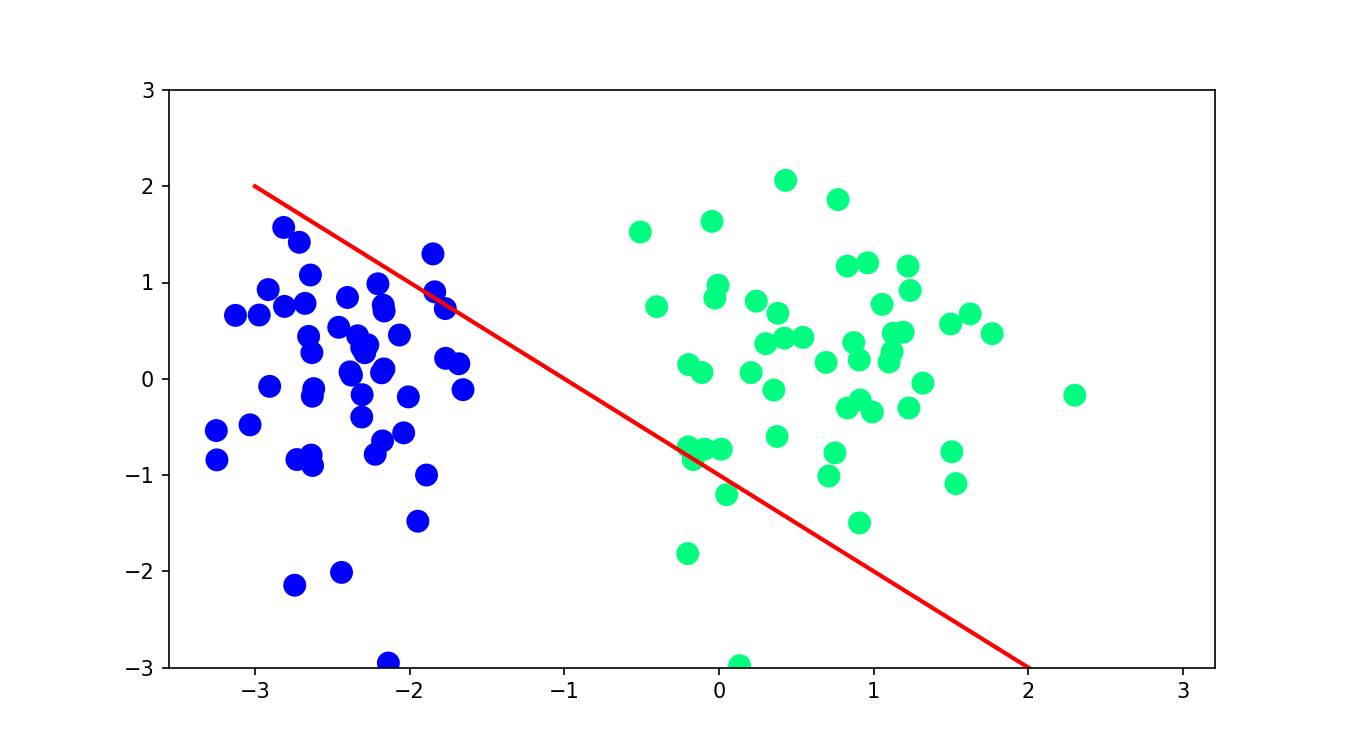

In [19]:
fig, ax = plt.subplots(figsize=(9,5))

x_i = np.arange(-3, 3, 0.1)
y_i = x_i*m[0] + b[0]
ax.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
line, = ax.plot(x_i, x_i*m[0] + b[0] , 'r-', linewidth=2)
plt. ylim(-3,3)
def update(i):

    label = 'epoch {0}'.format(i + 1)
    line. set_ydata(x_i*m[i] + b[i])
    ax. set_xlabel(label)

    # return Line, ax
    
anim = FuncAnimation(fig, update, repeat=True, frames=200, interval=100)


In [20]:
def Perceptron(X,y):
    
    w1=w2=b=1
    lr = 0.1
    
    for j in range(1000):
        for i in range(X.shape[0]):
            z = w1 * X[i][0] + w2 * X[i][1] + b
            
            if z*y[i] < 0:
                w1 = w1 + lr * y[i] * X[i][0]
                w2 = w2 + lr * y[i] * X[i][1]
                b = b + lr * y[i]
                
    return w1,w2,b

In [21]:
w1,w2,b = Perceptron(X,y)

In [22]:
print(w1,w2,b)

1.006638570722407 0.22215119727529098 1.3000000000000003


In [23]:
m = -(w1/w2)
c = -(b/w2)

In [24]:
print(m,c)

-4.531321834268464 -5.851870329508209


In [25]:
x_input = np.linspace(-3,3,100)
y_input = m*x_input + c

<IPython.core.display.Javascript object>


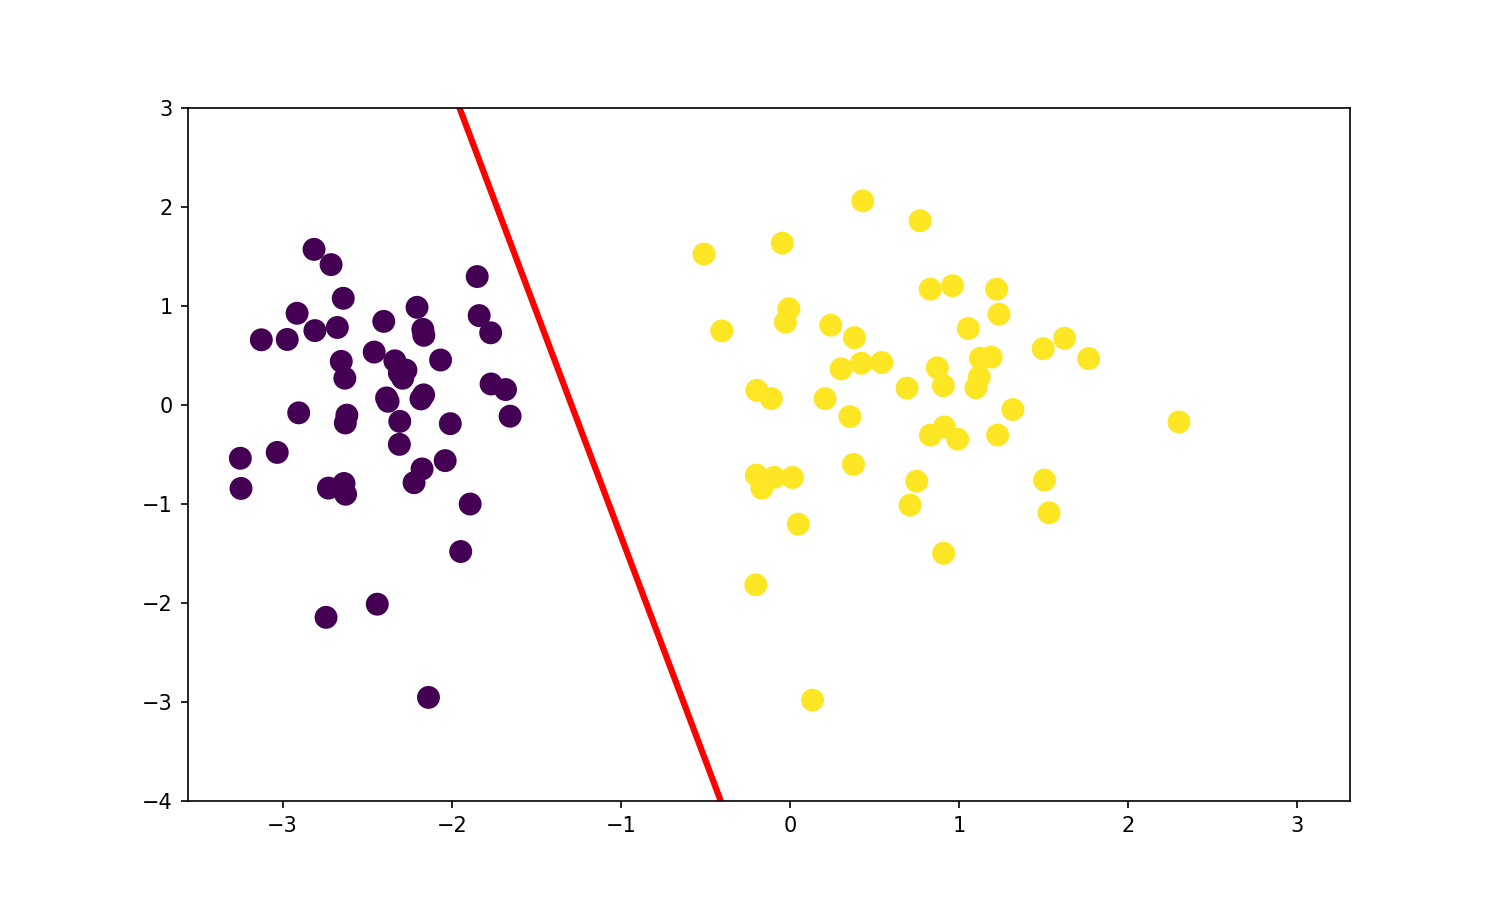

(-4.0, 3.0)

In [26]:
plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,c='r',linewidth=3)
plt.scatter(X[:,0],X[:,1],c=y,s=100)
plt.ylim(-4,3)